# Digit Recognition

DSC-440 Project 2

Brian Chaffee

---
**Description:**

Using the MNIST dataset adapted from the Kaggle Competition. The objective is to create a Convolutional Neural Network that successfuly is able to predict the correct digit from 0 to 9 from a list of handwritten digits.

[Kaggle Link](https://www.kaggle.com/competitions/digit-recognizer/code?competitionId=3004&sortBy=voteCount&excludeNonAccessedDatasources=true)
- The only adaptation is using `tensorflow.keras.datasets` instead of the provided datasets.

## Imports

In [1]:
# Imports
# # Basic Imports
import pandas as pd
import numpy as np

# # Machine Learning
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


# # # Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # # Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# # Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

Utilizing the tensorflow library to load in the dataset

In [2]:
from tensorflow.keras.datasets import mnist

# Loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Display the shape of the training and testing data to determine how they are structured for the model

In [3]:
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In order to better visualize what we are working with; we visualize an example of 5 points to see what the data looks like.

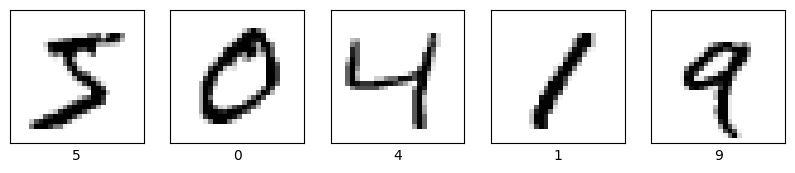

In [4]:
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

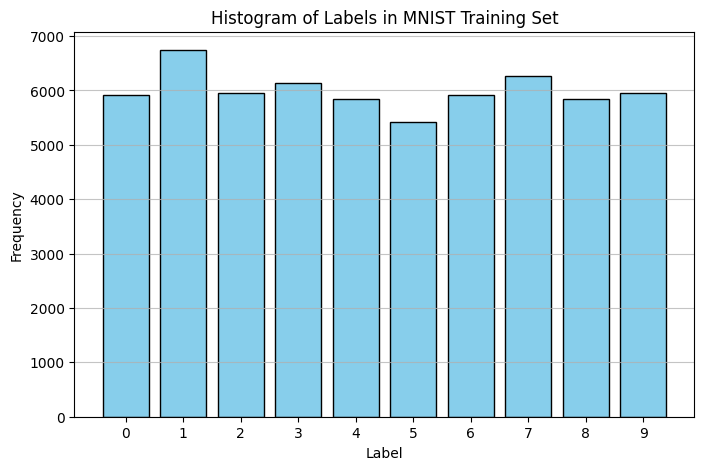

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Data Preprocessing

### Normalizing

Because the initial values range from 0 to 255, they are normalized to be in gray scale, or from 0 to 1

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Without Data Augmentation

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

In [10]:
model1 = models.Sequential([

    layers.Conv2D(784, (7, 7), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(56, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),


    layers.Flatten(),

    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/Users/brianchaffee/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Data Augmentation

In [16]:
datagen = ImageDataGenerator(
    
    rotation_range = 10,        # rotate image randomly within range of 10 degrees
    width_shift_range = 0.0,    # shift image horizontally
    height_shift_range = 0.0,   # shift image vertically
)

datagen.fit(X_train)

## CNN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

### Defining Model

In [14]:
epochs = 5

In [19]:
model2 = models.Sequential([

    layers.Conv2D(784, (7, 7), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(56, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2)),


    layers.Flatten(),

    layers.Dense(28, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Evaluating the Model

Without data-augmentation

In [15]:
# Train the mode
model1.fit(X_train, y_train, batch_size=42, epochs=epochs)

# Evaluate the model
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 129s 113ms/step - accuracy: 0.8082 - loss: 0.5761
Epoch 2/5
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 139s 122ms/step - accuracy: 0.9768 - loss: 0.0761
Epoch 3/5
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.9851 - loss: 0.0485
Epoch 4/5
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 143s 125ms/step - accuracy: 0.9881 - loss: 0.0379
Epoch 5/5
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 148s 129ms/step - accuracy: 0.9902 - loss: 0.0301
375/375 - 11s - 30ms/step - accuracy: 0.9886 - loss: 0.0381

Test accuracy: 0.9885833263397217


with data-augmented data

In [ ]:
# Train the mode
model2.fit(datagen.flow(X_train, y_train, batch_size=42),
          epochs=epochs)

# Evaluate the model
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


/Users/brianchaffee/.pyenv/versions/3.10.4/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


915/915 ━━━━━━━━━━━━━━━━━━━━ 105s 115ms/step - accuracy: 0.7929 - loss: 0.6244
Epoch 2/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 115s 125ms/step - accuracy: 0.9723 - loss: 0.0887
Epoch 3/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 116s 127ms/step - accuracy: 0.9788 - loss: 0.0662
Epoch 4/5
915/915 ━━━━━━━━━━━━━━━━━━━━ 117s 128ms/step - accuracy: 0.9842 - loss: 0.0513
Epoch 5/5
688/915 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - accuracy: 0.9856 - loss: 0.0445

### Confusion Matrix

300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


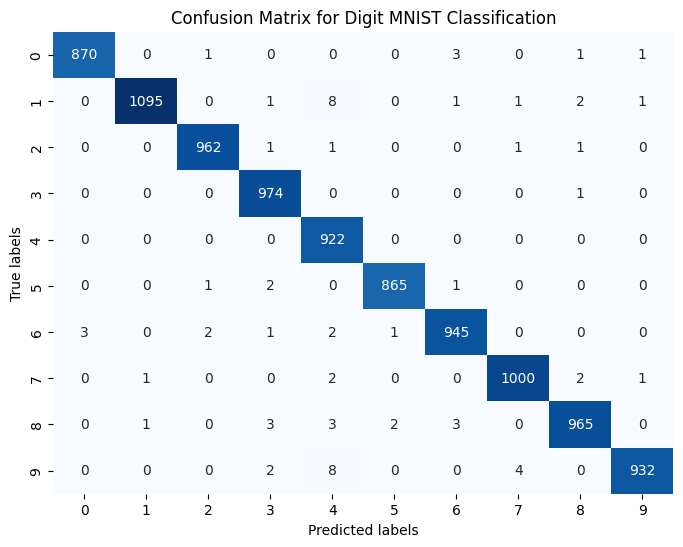

In [21]:
# Predict the test set
y_pred = np.argmax(model1.predict(X_test), axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Digit MNIST Classification')
plt.show()

In [ ]:
# Predict the test set
y_pred = np.argmax(model2.predict(X_test), axis=-1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Digit MNIST Classification')
plt.show()

Classification Report

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1175
           1       0.97      1.00      0.99      1322
           2       0.99      0.98      0.99      1174
           3       0.97      1.00      0.98      1219
           4       1.00      0.97      0.98      1176
           5       0.99      0.98      0.99      1104
           6       0.98      0.99      0.99      1177
           7       1.00      0.95      0.97      1299
           8       0.96      0.99      0.98      1160
           9       0.97      0.98      0.98      1194

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



---
## Citations

1. LeCun, Y., Cortes, C., & Burges, C. J. (2010). MNIST handwritten digit database. ATT Labs [Online].  Available: Http://Yann. Lecun. Com/Exdb/Mnist, 2.